# K-Means
Amaç,gözlem birimlerini,birbirlerine olan benzerliklerine göre kümelere ayırmaktır.



1.   Küme sayısı belirlenir.
2.   Rastgele K merkez seçilir
3.   Seçilen merkezlere olan uzaklıklar hesaplanır
4.   Her gözlem en yakın olduğu merkeze, yani kümeye atanır.
5.   Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
6.   Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareleri toplamlarının(total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı, nihai kümelenme olarak seçilir



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df = pd.read_csv("/content/USArrests.csv",index_col=0)
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

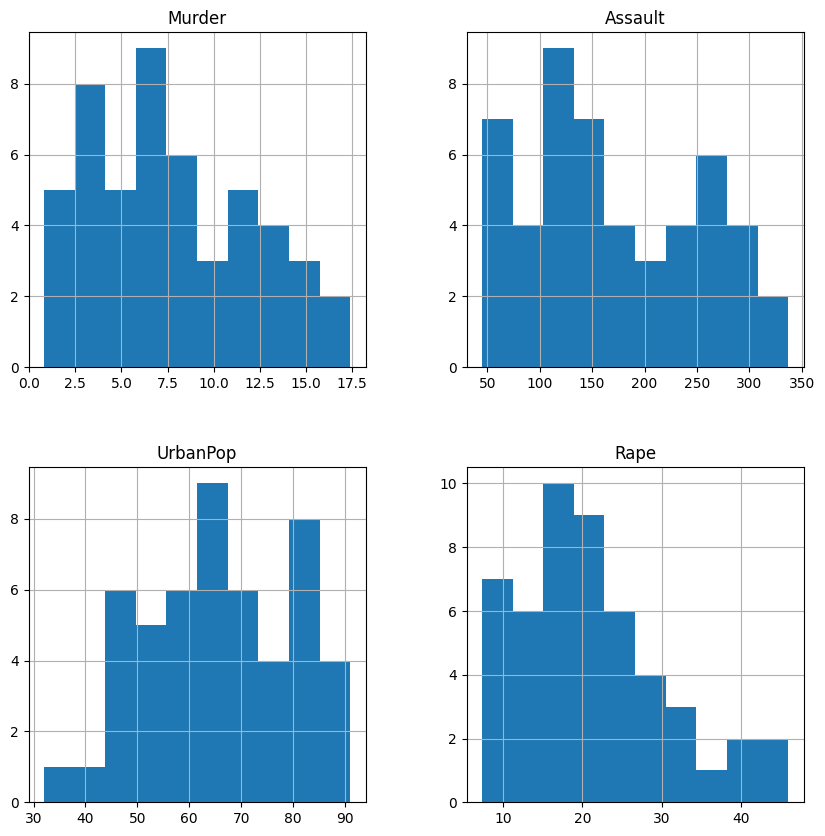

In [6]:
df.hist(figsize=(10,10))

In [7]:
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(df)

In [8]:
k_fit.n_clusters

4

In [9]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [10]:
clusters=k_fit.labels_  # Sınıfları alma

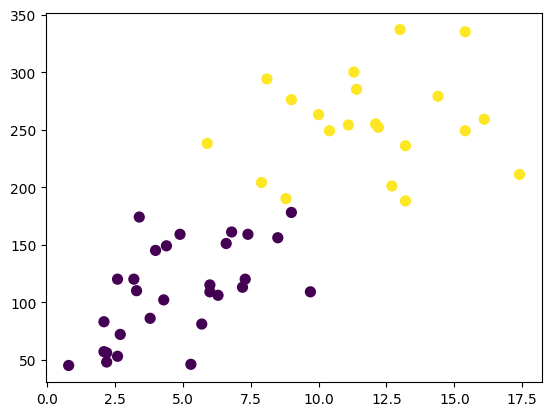

In [11]:
# Görselleştirme
# 2 cluster seçip görselleştirmeye çalışcaz

k_means=KMeans(n_clusters=2).fit(df)
clusters=k_means.labels_
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")

In [12]:
centers = k_means.cluster_centers_
centers

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

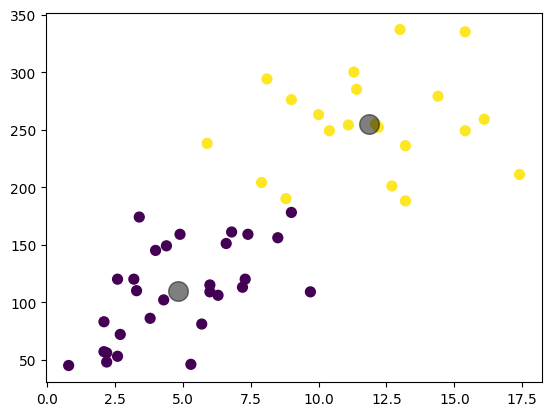

In [13]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5)
plt.show()

In [14]:
# K küme sayısını optimum olarak belirleme

# Elbow Yöntemi

ssd=[] # uzaklık farklarının karelerinin toplamı için

K = range(1,30)

for k in K:
  k_means = KMeans(n_clusters=k).fit(df)
  ssd.append(k_means.inertia_)  #  gözlem merkezine uzaklığı

Text(0.5, 1.0, 'Optimum küme sayısı için Elbow yöntemi')

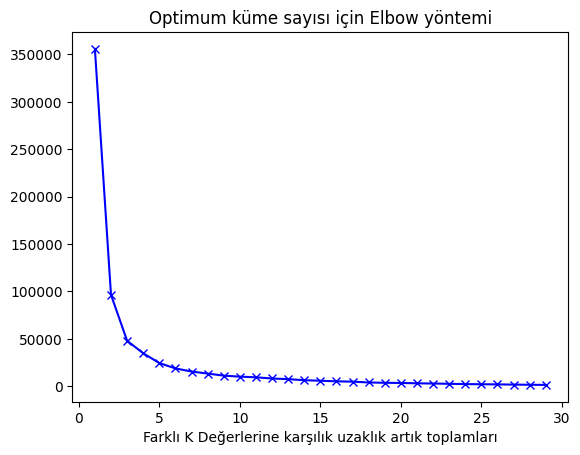

In [15]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine karşılık uzaklık artık toplamları")
plt.title("Optimum küme sayısı için Elbow yöntemi")

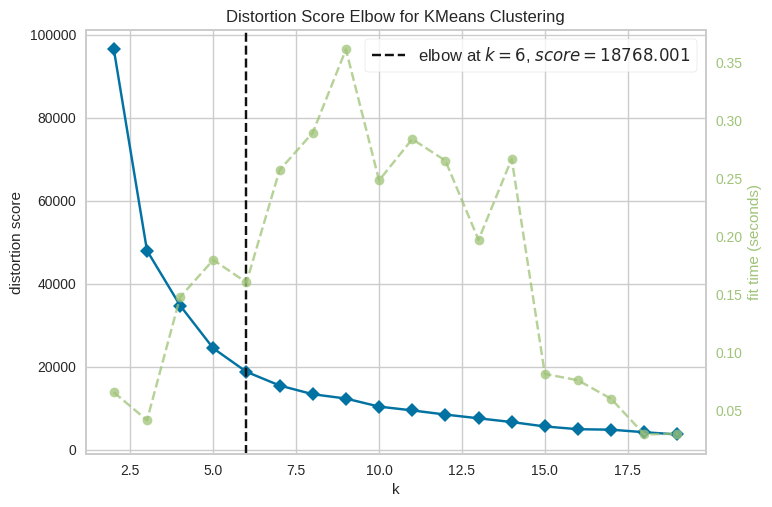

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#  Yellowbrick Kütüphanesini kullanarak Elbow Yöntemini ele alma
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
visu = KElbowVisualizer(kmeans,k=(2,20))
visu.fit(df)
visu.poof()

In [21]:
# Optimum K means 
kmean = KMeans(n_clusters=6).fit(df)
clusters = kmean.labels_
centers = kmean.cluster_centers_
pd.DataFrame({"States":df.index,"Clusters":clusters})
df["Cluster_No"] = clusters
df

,Murder,Assault,UrbanPop,Rape,Cluster_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,4
Connecticut,3.3,110,77,11.1,5
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,4


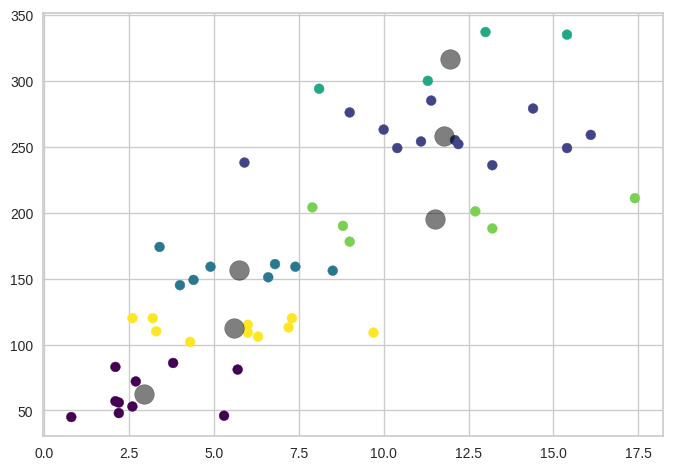

In [22]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")     # Assault:df.iloc[:,1] == y , Murder:df.iloc[:,0]
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5)          
plt.show()

In [23]:
df.iloc[:,0] #Murder 


Alabama           13.2
Alaska            10.0
Arizona            8.1
Arkansas           8.8
California         9.0
Colorado           7.9
Connecticut        3.3
Delaware           5.9
Florida           15.4
Georgia           17.4
Hawaii             5.3
Idaho              2.6
Illinois          10.4
Indiana            7.2
Iowa               2.2
Kansas             6.0
Kentucky           9.7
Louisiana         15.4
Maine              2.1
Maryland          11.3
Massachusetts      4.4
Michigan          12.1
Minnesota          2.7
Mississippi       16.1
Missouri           9.0
Montana            6.0
Nebraska           4.3
Nevada            12.2
New Hampshire      2.1
New Jersey         7.4
New Mexico        11.4
New York          11.1
North Carolina    13.0
North Dakota       0.8
Ohio               7.3
Oklahoma           6.6
Oregon             4.9
Pennsylvania       6.3
Rhode Island       3.4
South Carolina    14.4
South Dakota       3.8
Tennessee         13.2
Texas             12.7
Utah       

In [24]:
df.iloc[:,1] # Assault

Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48
Virginia  